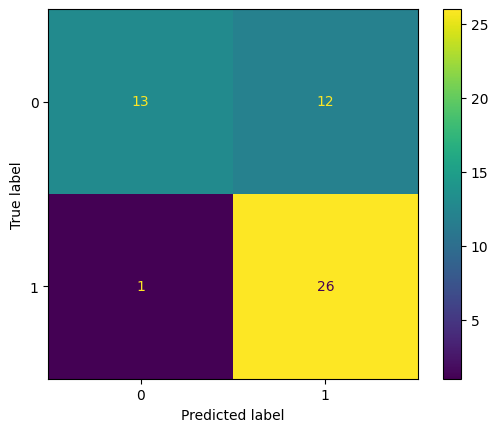

In [1]:

# Preparing Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Load the rock mines dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url)
column_names = ["sensor_" + str(i) for i in range(1, 61)] + ["target"]
df.columns = column_names
df = df.reset_index()
df = df.rename(columns={"index": "id"})
df['target'] = df['target'].map({'M': 1, 'R': 0})
x_data = df.iloc[:, :60]
x_data = x_data.drop('id', axis=1)
y_data = df['target']


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,random_state=0)
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

